In [12]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as symp

plt.style.use('default')

## Questão 1 - Sinais de Energia e de Potência

Podemos classificar sinais determinísticos como sinais de *potência* ou de *energia*. 

- *Sinais de Potência*:

  - São ditos todos os sinais contínuos ou discretos que são periódicos. 
  - O cálculo da potência de sinais contínuos, onde $x$ é o sinal e $T_0$ é o período, é dado pela seguinte integral:
  
  \begin{equation}
  P = \frac{1}{T_0} \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} |x(t)|^2 \ dt
  \end{equation}
  
  - O cálculo da potência de sinais discretos, onde $x$ é o sinal e $N$ é o período, é dado pela seguinte integral
  
  \begin{equation}
  P = \frac{1}{N} \sum_{n = 0}^{N-1} |x[n]|^2 
  \end{equation}

- *Sinais de Energia*:

  - São ditos todos os sinais contínuos ou discretos que não são periódicos.
  - O cálculo da energia de sinais contínuos, onde $x$ é o sinal, é dado pela seguinte integral:
  
  \begin{equation}
  P =\int_{-\infty}^{\infty} |x(t)|^2 \ dt
  \end{equation}
  
   - O cálculo da energia de sinais discretos, onde $x$ é o sinal, é dado pela seguinte integral:
  
  \begin{equation}
  P = \sum_{n = -\infty}^{\infty} |x[n]|^2 
  \end{equation}
 
Sendo assim, escreva um trecho de código python que calcula a potência ou energia dos seguintes sinais:


a. Calcule a energia do sinal discreto definido por:


|0 | 1 | 2 | 3 | 4  | 5| 6| 7|8| 9|10|11| 
|---|----|----|----|----|---|---|---|---|---|---|---|
|0 | 0 | -2| -1| 0  | 1| 2| 3| 4|0| 0|0|0|


b. Calcule a potência do sinal contínuo definido por:

\begin{equation}
x(t) = 4 \cos (10 \pi t)
\end{equation}

c. Calcule a potência do sinal discreto definido por:

\begin{equation}
x[n] = \cos \left[n \frac{\pi}{3}\right]
\end{equation}




*Observações*: para calcular a integral, utilize a biblioteca `sympy` e a função `sympy.integrate`


#### Resposta pergunta a)

In [13]:
n = [0,1,2,3,4,5,6,7,8,9,10,11]
x = [0,0,-2,-1,0,1,2,3,4,0,0,0]
p=0
P=[]
for i in range(0,12):
  p = x[i]**2
  P.append(p)
#print(P)
PTot = sum(P)
print('A energia do sinal é igual a ',PTot)

A energia do sinal é igual a  35


##### Resposta pergunta b)

In [14]:
tt= np.arange(-10, 10,0.02)
xx= 4*np.cos(10*np.pi*tt)
w0 = 10*np.pi
T0 = 2*np.pi/w0

x,t = symp.symbols('x t')
x = 4*symp.cos(10*np.pi*t)
Potencia = (1/T0)*symp.integrate(x**2,(t,-T0/2,T0/2))
print('A potencia do sinal continuo é igual a',float(Potencia))

A potencia do sinal continuo é igual a 8.0


##### Resposta pergunta c)

In [15]:
w0 = np.pi/3
N = 2*np.pi/w0

nn= np.arange(0, N,1)
xx = np.cos(nn*np.pi/3) 

PotDisc = (1/N)*np.sum(xx**2)
print('A potencia do sinal discreto é igual a ',PotDisc)

A potencia do sinal discreto é igual a  0.5


## Questão 2 - Convolução Discreta

*Convolução* é o nome dado a uma operação matemática entre dois sinais, cuja saída é um terceiro sinal. A operação de convolução dos sinais $x$ e $h$ é denotada pela seguinte expressão:

\begin{equation}
\hat{x}[n] = \sum_{k = -\infty}^{\infty} x[n] \cdot h[n - k]
\end{equation}

Anteriormente utilizamos a função `np.convolve` para realizar a convolução de dois sinais discretos $x$ e $h$. Desta vez, implemente a sua versão da função que realiza a convolução de dois sinais. Siga as instruções a seguir:

1. Construa um sinal $x$, que é definido por $x[n] = \sin (2 \cdot  \pi \cdot  \frac{1}{50} \cdot n) + \mathcal{N}(\sigma = 0.1, \mu = 0) \quad \text{onde, } n = \{n \in \mathcal{I} \ | \ 0 \leq n < 64 \}$;

2. Construa um sinal $h$, que é definido por $h[n] = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{(n - \mu)}{\sigma})^2} \quad \text{onde, } n = \{n \in \mathcal{I} \ | \ 0 \leq n < 64 \}$, use $\mu = 32$ e $\sigma = 2$;

3. Crie e implemente uma função chamada `convoluir` que realiza a convolução entre dois sinais;

4. Compare os resultados obtidos com a função `np.convolve` e mostre que os resultados são semelhantes.

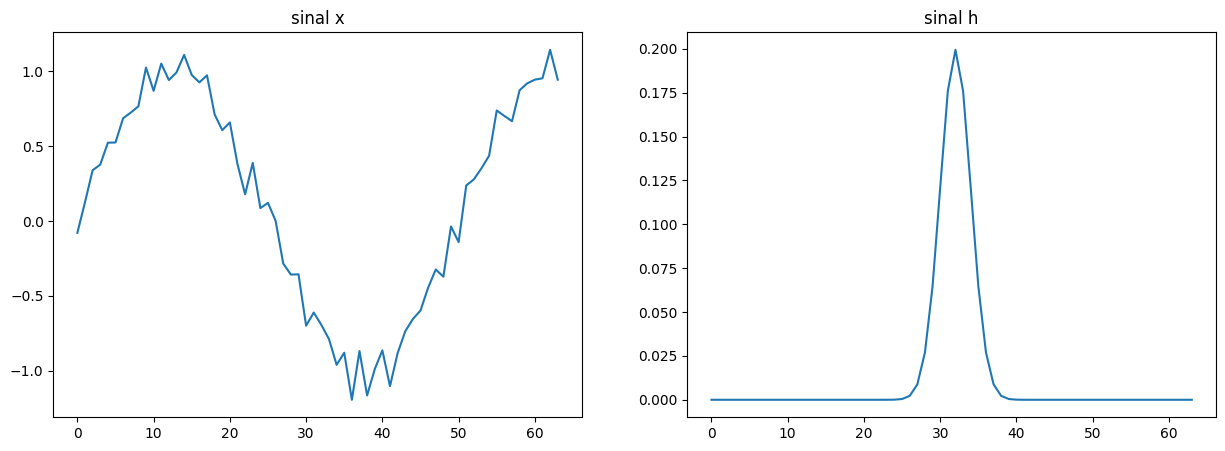

In [17]:
#QUESTÃO 2
n = np.arange(0,64,1)

#1 - construção de x 
sigmax = 0.1; mix = 0;
ruido = np.random.randn(n.shape[0])*sigmax+mix 
x = np.sin(2*np.pi*(1/50)*n) + ruido

#2 - construção h
sigmah = 2; mih = 32;
h = np.exp((-1/2)*((n-mih)/sigmah)**2)/(sigmah*(2*np.pi)**(1/2))

plt.figure(figsize = (15,5))
plt.subplot(1,2,1);plt.plot(n,x);plt.title('sinal x')
plt.subplot(1,2,2);plt.plot(n,h);plt.title('sinal h');

In [18]:
#3 - função CONVOLUIR

def CONVOLUIR(sinal_1,sinal_2):

  len_sinal_1 = np.size(sinal_1)
  len_sinal_2 = np.size(sinal_2)
  resultado = np.zeros(len_sinal_1 + len_sinal_2 - 1)
  
  for i in range(0,len_sinal_1):
    for j in range(0,len_sinal_2):
      resultado[i+j] = resultado[i+j] + sinal_1[i]*sinal_2[j]
      
  return resultado    
                          

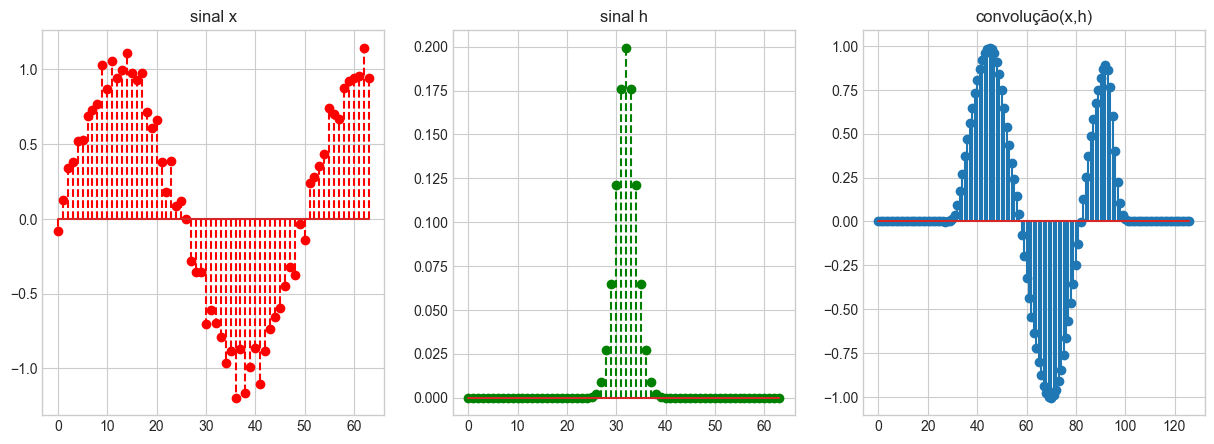

In [20]:
sinal_1 = x
sinal_2 = h
Con = CONVOLUIR(x,h)

plt.figure(figsize=(15,5));plt.tight_layout();
plt.subplot(1,3,1);plt.stem(n,x, '--or');plt.title('sinal x')
plt.subplot(1,3,2);plt.stem(n,h, '--og');plt.title('sinal h')
plt.subplot(1,3,3);plt.stem(Con);plt.title('convolução(x,h)'); 

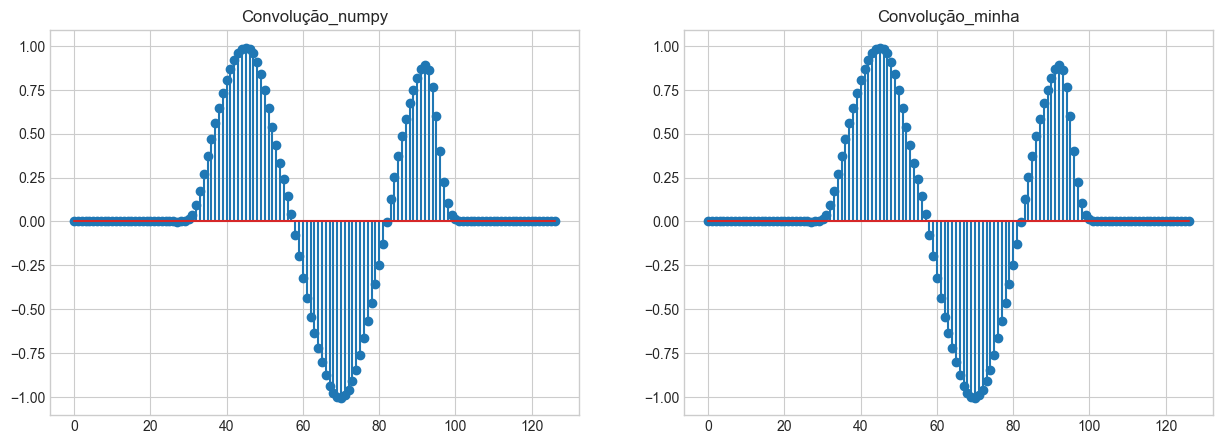

In [22]:
# 4 - Comparação da função desenvolvida com a função pronta do numpy.

Convolução_numpy = np.convolve(x,h)
Convolução_minha = CONVOLUIR(x,h)

plt.figure(figsize=(15,5));plt.tight_layout();
plt.subplot(1,2,1);plt.stem(Convolução_numpy);plt.title('Convolução_numpy')
plt.subplot(1,2,2);plt.stem(Convolução_minha);plt.title('Convolução_minha');

## Questão 3 - Filtro de Sinais no Domínio da Frequência


A operação de convolução no domínio do tempo pode ser representada no domínio da frequência por uma multiplicação ponto a ponto entre os dois espectros de frequência. Esta abordagem reduz a complexidade computacional para aplicação de filtros digitais em sinais de uma ou mais dimensões, permitindo a utilização de filtros digitais em aplicações que executam em tempo real.

Sendo assim, utilizando os sinais $x$, $h$ construídos na Questão 2, realize o mesmo procedimento de convolução utilizando a Transformada de Fourier. Para isso, siga os passos abaixo:

1. Construa o espectro de frequência para os sinais $x$ e $h$ utilizando a transformada de Fourier;
2. Represente graficamente o espectro de cada um dos sinais, juntamente com os sinais originais;
3. Realize a multiplicação ponto a ponto dos dois espectros e represente graficamente o resultado obtido;
4. Aplique a Transformada Inversa de Fourier no espectro resultante da multiplicação;
5. Compare graficamente e numericamente o sinal transformado com o resultado da operação de convolução realizada anteriormente.

*Observação 1:* Utilize a função de transformada de Fourier de sua preferência (implementada por vocês ou a disponibilizada pela biblioteca `numpy` do Python).

*Observação 2*: os resultados não precisam ser idênticos, as regiões de extremos (bordas) do sinal podem variar já que o método de convolução pode ser calculado de diferentes formas.

*Dica*: A função `np.fft.fftshift` pode ser utilizada para inverter as metades do sinal. Será útil após realizar a transformada rápida inversa.

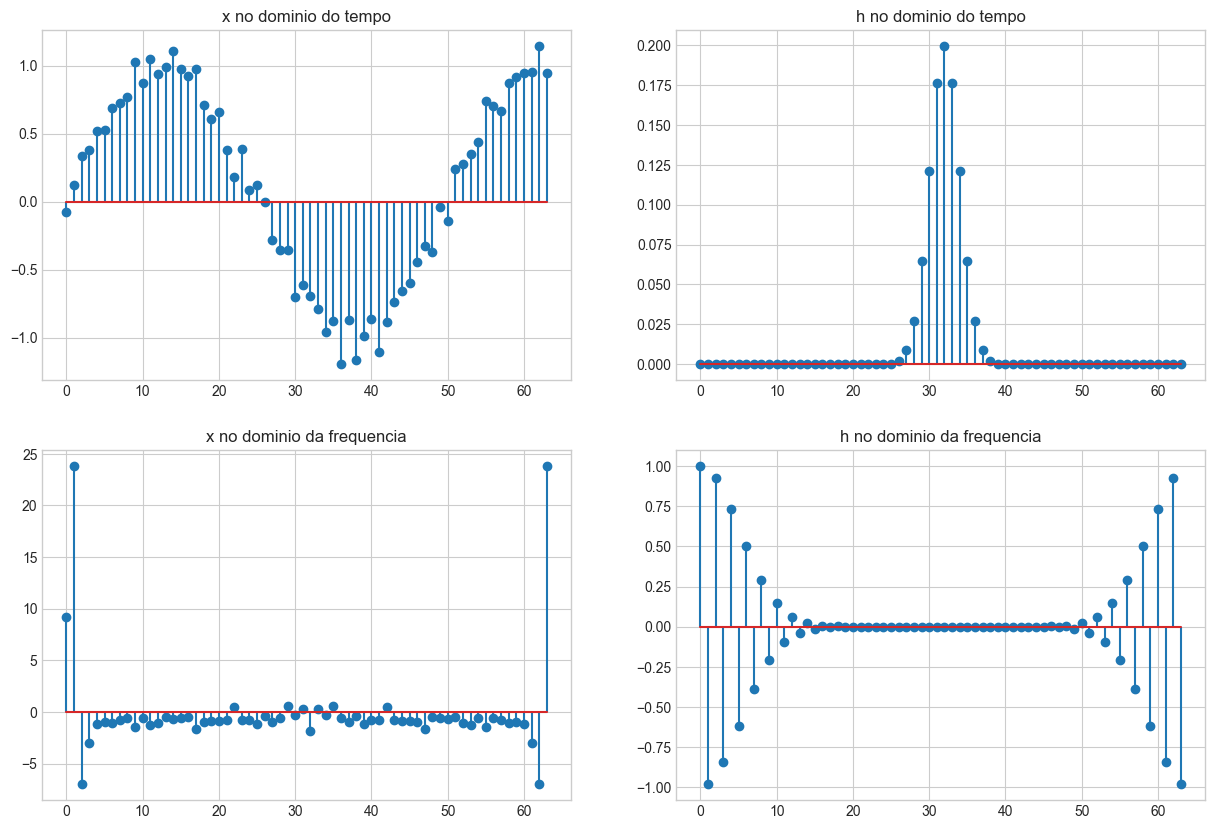

In [24]:
# TRANSFORMADA DE FOURIER

x_fft = np.fft.fft(x); h_fft = np.fft.fft(h);


plt.figure(figsize=(15,10));plt.tight_layout();
plt.subplot(2,2,1);plt.stem(x);plt.title('x no dominio do tempo')
plt.subplot(2,2,2);plt.stem(h);plt.title('h no dominio do tempo')
plt.subplot(2,2,3);plt.stem(x_fft);plt.title('x no dominio da frequencia')
plt.subplot(2,2,4);plt.stem(h_fft);plt.title('h no dominio da frequencia');

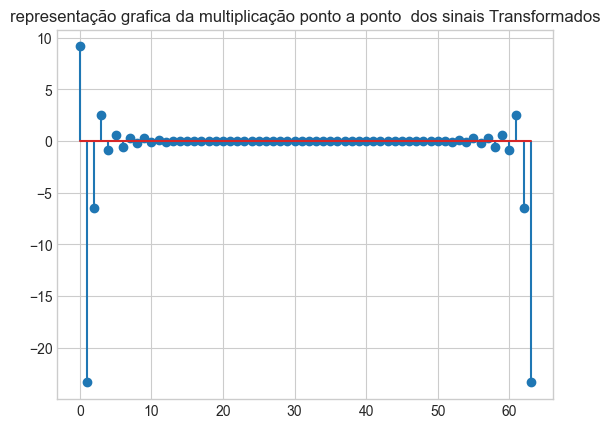

In [25]:
multiplicação_x_h = np.zeros(len(n))

for i in range(0,len(n)):
  multiplicação_x_h = x_fft*h_fft
  
plt.figure()
plt.stem(multiplicação_x_h);plt.title('representação grafica da multiplicação ponto a ponto  dos sinais Transformados');

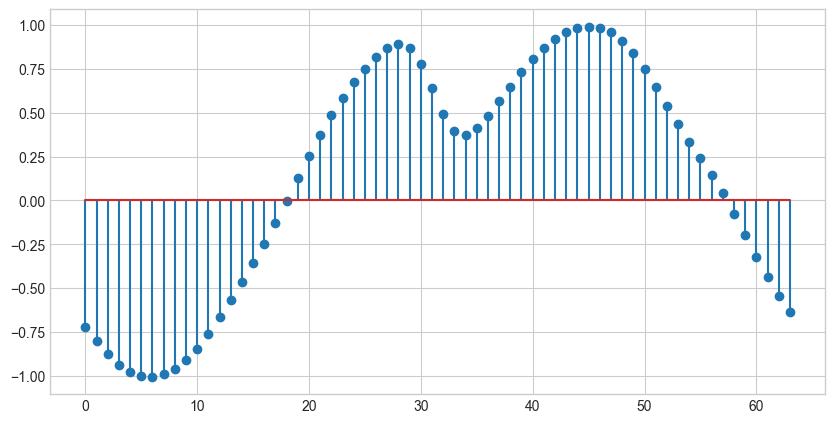

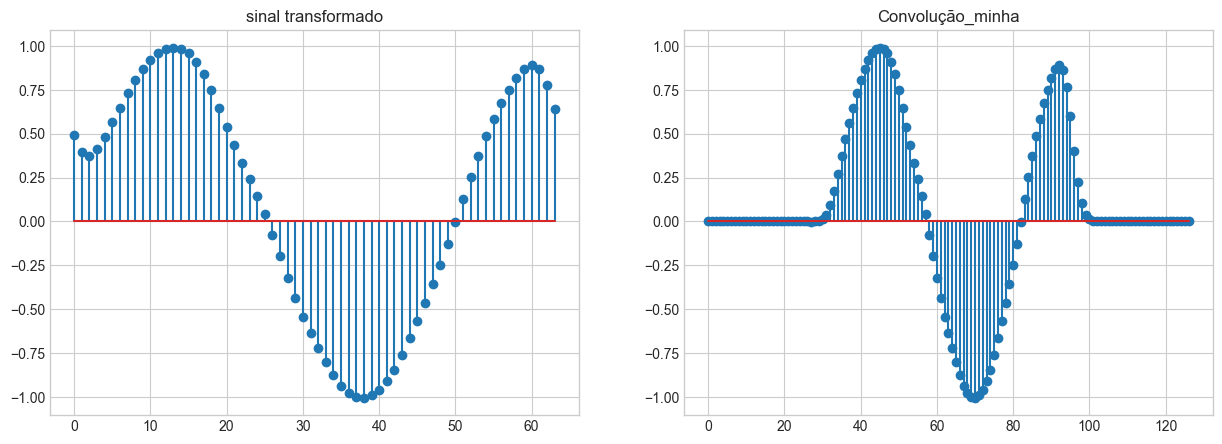

In [27]:
# Transformada inversa de fourier

multiplicação_x_h_ifft = np.fft.ifft(multiplicação_x_h)
multiplicação_x_h_ifft_final = np.fft.fftshift(multiplicação_x_h_ifft)

plt.figure(figsize=(10,5));plt.stem(multiplicação_x_h_ifft)
plt.figure(figsize=(15,5));
plt.subplot(1,2,1);plt.stem(multiplicação_x_h_ifft_final);plt.title('sinal transformado')
plt.subplot(1,2,2);plt.stem(Convolução_minha);plt.title('Convolução_minha');

## Questão 4 - Transformada Rápida de Fourier

Considere que o código abaixo faz a transformação de um dado sinal, levando-o do domínio do tempo para o domínio da frequência utilizando o algoritmo da Transformada Rápida de Fourier (*Fast Fourier Transform*), através da seguinte definição matemática:

\begin{equation}
X_{k} = \text{par}_{k} + e^{-\frac{2i\pi k}{N}} \cdot \text{impar}_k\\
X_{k+\frac{N}{2}} = \text{par}_{k} - e^{-\frac{2i\pi k}{N}} \cdot \text{impar}_k
\end{equation}

Dito isso, implemente uma nova função chamada `ifft` que realiza a transformada rápida inversa, capaz de trazer o sinal do domínio da frequência para o domínio do tempo. Depois disso, compare o resultado obtido com a função nativa do python `np.fft.ifft`.

1. Implemente a função `ifft`;
2. Utilizando a transformada rápida de Fourier, leve o sinal original para o domínio da frequência;
3. Realize a reconstrução do sinal através da função `ifft` que foi desenvolvida;
4. Compare graficamente e numericamente os resultados obtidos com a função `np.fft.ifft` mostrando que os resultados são equivalentes.

**Equação da Transformada de Fourier**
\begin{equation}
X[k] = \sum_{n = 0}^{N-1} x[n] \cdot e^{-\frac{2\pi i}{N}}
\end{equation}

**Equação da Transformada Inversa de Fourier**
\begin{equation}
x[n] = \frac{1}{N}\sum_{k = 0}^{N-1} X[k] \cdot e^{\frac{2\pi i}{N}}
\end{equation}

In [28]:
def fft(x):
  
  N = len(np.array(x))
  
  if N == 1:
    return np.array(x)
  
  else:

    Ypar   = fft(x[0::2])
    Yimpar = fft(x[1::2])
    
    Y = np.zeros(len(x), dtype='complex')
    
    for k in range(0, N//2):
      
      Y[k]      = Ypar[k] + np.exp(-2j * np.pi * k / N) * Yimpar[k] 
      Y[k+N//2] = Ypar[k] - np.exp(-2j * np.pi * k / N) * Yimpar[k] 
   
    return Y 

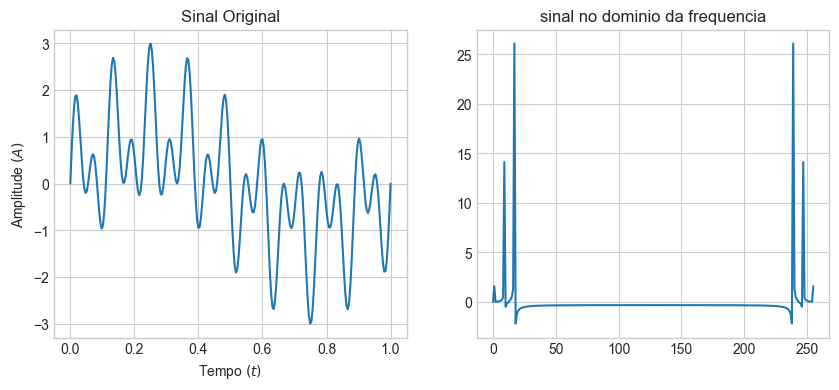

In [29]:
t = np.linspace(0, 1, 2**8)

sinal = np.sin(2 * np.pi * t * 17) + np.sin(2 * np.pi * t * 9) + np.sin(2 * np.pi * t * 1)

sinal_fft = fft(sinal)




plt.figure(figsize=(10,4))
plt.subplot(1,2,1);plt.plot(t, sinal);plt.title('Sinal Original')
plt.xlabel('Tempo $(t)$')
plt.ylabel('Amplitude $(A)$')
plt.subplot(1,2,2);plt.plot(sinal_fft);plt.title('sinal no dominio da frequencia')
plt.show()

In [30]:
# implementação da ifft

def ifft(sinal):
  
  N = len(np.array(sinal))
  
  if N== 1:
    return np.array(sinal)
  else:
    Ipar = ifft(sinal[0::2])
    Iimpar = ifft(sinal[1::2])
    
    I = np.zeros(len(sinal),dtype='complex')
    
    for k in range(0,N//2):
      
      I[k] = Ipar[k] + np.exp(2j*np.pi*k/N)*Iimpar[k]
      I[k+N//2] = Ipar[k] - np.exp(2j*np.pi*k/N)*Iimpar[k]
    Inorm = (I/len(I))*(N/2)
    return Inorm
      

d:\DL-SELECIONADO\.venv\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


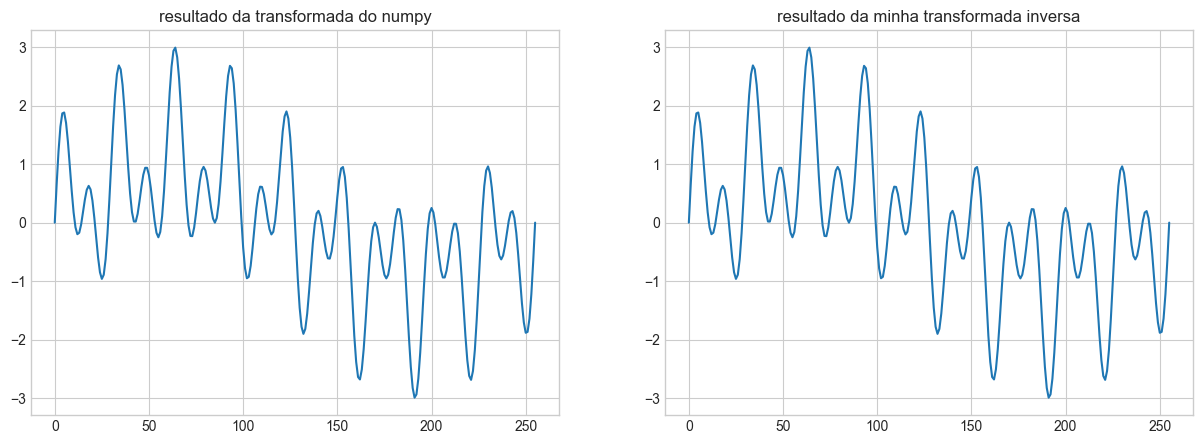

In [32]:
sinal_ifft = ifft(sinal_fft)

sinal_ifft_numpy = np.fft.ifft(sinal_fft)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1);plt.plot(sinal_ifft_numpy);plt.title('resultado da transformada do numpy')
plt.subplot(1,2,2);plt.plot(sinal_ifft);plt.title('resultado da minha transformada inversa');